
# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [ CNN 2 ](#CNN-2 )
  * [CNN Algorithms](#CNN-Algorithms)
      * [LeNet](#LeNet)
        * [learning rate decay](#learning-rate-decay)
        * [LearningRateScheduler](#LearningRateScheduler)
      * [AlexNet](#AlexNet)
          * [ReduceLROnPlateau](#ReduceLROnPlateau)

---
- 2015년부터 컴퓨터가 이미지 인식을 사람의 넘어버림 

# CNN 2
## CNN Architecture

### LeNet
- CNN(Convolution Neural Network) 을 처음으로 개발한 Yann Lecun 1998년에 개발한 CNN 알고리즘
  - 특징 추출도 CNN의 학습을 통해서 end-to-end 모델
- 논문 : Gradient-Based Learning Applied to Document Rocognition
  - 최초의 성공한 cnn 모델로 당시 레이어가 많아지면 학습이 되지않는 gradient vanishing 문제로 AI 암흑기여서 NN을 붙이지 않음
  - SVM(Support Vector Machine) 과 달리 emperical(경험적)하고 black-box임으로 관심이 크게 없음
  - 모델 비교 : 다양한 algorithm에 대해서 성능 비교 
    > NFL  
  - **data augmentation** 사용함(이전부터 있던 방법)
    - **transitional invariance** (위치와 무관함) 하고 나머지는 equivariance하기 때문에 필요함
    - augmentation 하면 데이터가 늘어나서 batch size만큼 올리지 못하면 메모리 문제가 생김

### 차이점
1. activation funciton= hyperbolic tangent [-1,1]
  - 그 당시에 relu [0,x] 없음 

2. optimizer = Stochastic Gradient Descent(SGD)
  - 에폭마다 **랜덤하게(stochastically)** 셔플해서 그 중 한 개만 갖고 하나 뽑아 gradient descent <=> batch 전체 데이터
  - local minima에 빠지지 않음 
  - 값 업데이트를 하나로 하기 때문에 속도가 빠르나 노이즈가 있으면 성능 안 좋아짐(빠른속도, 메모리 효율적)
      > [Identifying and attacking the saddle point problem in high-dimensional non-convex optimization](https://arxiv.org/abs/1406.2572)논문, Yoshua Bengio, 조경현 교수님
      - 요즘은 딥러닝에서는 복잡한 고차원 공간 hyper space에서 동시에 0이 되기 힘들기 때문에 local minima 고려하지 않음( imperical)

3. subsampling(=Avg pooling)
    - pooling은 equivariance 깸 
    - 요즘은 pooling 대신 stride 이용함
    > [Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806)
4. learning rate decay
- epoch이 실행할수록 learning rate이 점점 작아진것을 학습에 사용함 

### LeNet구현 
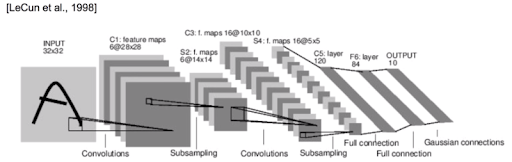
- key points
  - learning rate를 횟수마다 바꾸기(learning rate decay)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1,activation='tanh',padding='same', input_shape=(32,32,1)))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))  
                            
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,strides=1, activation='tanh',padding='valid'))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              

model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

> - 대문자: class - 상속 가능
> - 소문자: function

### learining rate decay
-  epoch 마다 학습률 줄임
  - 크기가 그대로면 최소점에 가까워 질때 overshooting발산 되어서 gradient exposion됨

In [ ]:
model.compile( loss='sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.SGD() )

### LearningRateScheduler
- epoch 한 번 돌 때마다 현재의 epoch,  learning rate 반환하고 업데이트된 learning rate를 optimizer에 적용함
  - `learning_rate` : 상황에 맞추어 실행되면서 크기가 클수록 값도 작아짐

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def learning_rate(epochs):
  if epochs >9:
    lr =1e-5 
  elif epochs>5:
    lr = 5e-5
  elif epochs>2:
    lr= 2e-4
  else:
    lr =5e-4 
  return lr

In [ ]:
learning_rate(2),learning_rate(3),learning_rate(6),learning_rate(10) #epoch 횟수 커질수록 larning rate 감소

(0.0005, 0.0002, 5e-05, 1e-05)

In [ ]:
lr=tf.keras.callbacks.LearningRateScheduler(learning_rate) #함수로 받음


### SGD 
참고 : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [ ]:
tf.keras.optimizers.SGD(learning_rate=0.01) #기본 값이 0.01로 고정되어있음 

In [ ]:
#callback LearningRateScheduler  예시 
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(-1,28,28,1)
## model
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), 
                                 strides=1,activation='tanh',padding='same', input_shape=(28,28,1)))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                                 strides=1, activation='tanh',padding='valid'))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              

model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=5,
                                 strides=1, activation='tanh', padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

### compile & fit
model.compile( loss='sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.SGD() )

model.fit(X_train,y_train, epochs=20, callbacks=[lr]) #callbacks 리스트 형태로 넣음 

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7031
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9009
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6351
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5428
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5064
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4762
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4594
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4532
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4472
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4414
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4380
Epoch 12/20
1875/187


---
## AlexNet 
- 2012 ImageNet Large Scale Visual Recognition Challenge(ILSSVRC contest) 에서 우승하면서 인기 많아짐
- 이전보다 효율적으로 computing resource 사용
- 논문: ImageNet Classification with Deep Convolutonal Neural Networks by Hinton

### 차이점
- GPU 2개로 나눠서 사용 -> 3G 2개의 GPU cuda 이용해도 당시 하드웨어 성능때문
    - 좋은 결과를 위해 학습 데이터 양이 많이 필요한데 학습하려면 연산량이 많음
        - couvolution layer: data Parallelism
            - convolution 연산에서 이미지의 픽셀을 옮겨가면서 반복적인 행렬연산의 수행         
        - Fully connected layer : Model Parallelism
 
    - 색상 무관한 48개 fautures & 색상 관련 48개 fautures
  
- stride = 4: 학습시간 오래걸려서 
- kernel size (11, 11) 
- zero-padding 사용 (크기 맞춤)
- Max Pooling & overlapping pooling
    -  일반적으로 convolution통해 얻은feature map 크기를 줄이기 위해사용하는데 window 크기에 맞춰 stride를 지정하여 겹치지 않게 하는데 더 stride를 작게하여 겹치도록 함
- Local Response Normalization: 성능에 영향 없음 
  - 나중에 5가지 배울 예정인데 이중에 속하지는 않음: batch normalization
- **ReLU**: rectified여서 학습 속도가 빠르고 역전파에서 간단해지게 됨 gradient vanishing 방지-> 표준화 됨!!! 

2. 과적합 방지를 위한 전략 
    A. data augmentation 철저하게함(transitional invariant!)
      -학습 데이터 양을 늘리게 되면 학습시간일 길어지게됨
      - 256 x 256 ->224 x 224 크기로 무작위
      - RGB channel 값 변환
    B. **DropOut**
      - dropout 을 ensemble 효과( co-adaptataion 피함)
      > [Improving neural networks by preventing co-adaptation of feature detectors](https://arxiv.org/pdf/1207.0580.pdf）
      - 없더라도 **학습시에만 랜덤하게 없애기 때문에** 모델을 만들어도 합쳐서 하나의 최종 모델을 만듦 (집단지성)
      - batch normalization이 생기면서 역할이 조금 줄어듦
- **initialize**
- batch size 크기 키움
- optimizer : SGD련Momentum 
- learning rate decay를 Plateu(고원현상이 지속되면)/어느정도 성능이 안 떨어지면 learning rate를 줄임 
- 초기값에 따른 다른 모델 7개 CNN 만들어서 ensemble 해서 성능 향상
    -어떻게 초기화 하는지에 따라서 학습되는 정도를 조절함  (Xavier..)

  optimizer, ensemble  - 가우시안 분포 기반으로 평균냄(bagging과 비슷)
- weight decay

현대의 대부분의 기법이 여기에서 기반이 됨.
> 이전 논문이므로 요즘에 안 쓰는것들도 존재함

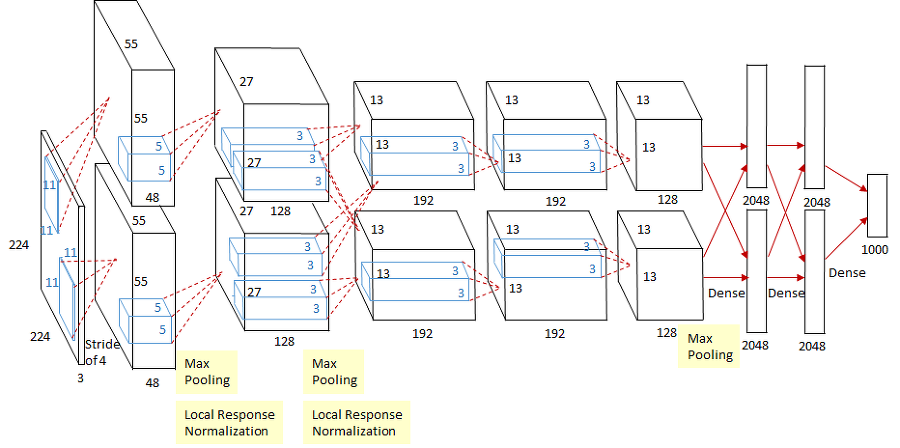

In [ ]:
tf.keras.layers.Dense(kernel_initializer= ,bias_initializer= ) # kaiming He, Xavier Initialization ..어떻게 초기화 하는지에 따라서 학습되는 정도를 조절함

### AlexNet 구현
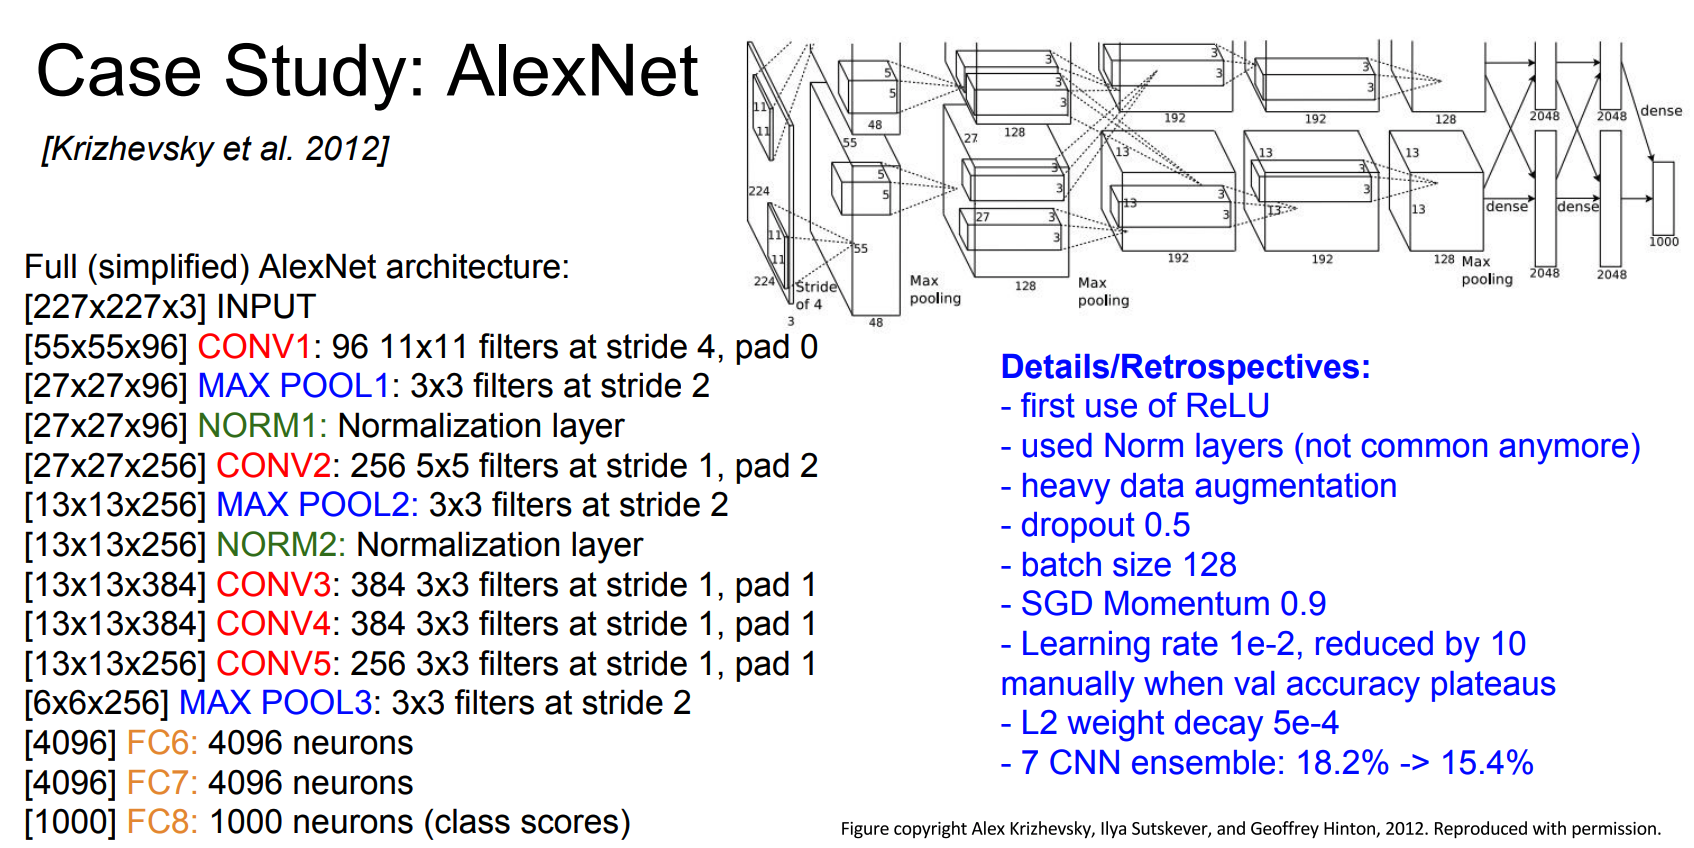
참고. [CS231n 2017 9강](https://www.youtube.com/watch?v=DAOcjicFr1Y&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=9&ab_channel=StanfordUniversitySchoolofEngineering)
TensorFlow 이용해서 구현

In [16]:
model = tf.keras.models.Sequential()

#2의 배수인 이유는 CPU 할당하기 위해서 
model.add(tf.keras.layers.Conv2D(filters=96,kernel_size=11, strides=4,padding='valid',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),activation='relu', input_shape=(227,227,3)) )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2) ))
#model.add(LRN() ) #케라스에 없어서.

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, strides=1,padding='same', activation='relu') )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2 ,padding='valid' ))
#model.add(LRN() ) 
model.add(tf.keras.layers.Conv2D(filters=384,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )

model.add(tf.keras.layers.Conv2D(filters=384,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2 ,padding='valid' ))

#여기서 FCNN 2개를 사용함 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #2048 개를 랜덤하게 제외

model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #2048 개를 랜덤하게 제외

model.add(tf.keras.layers.Dense(1000, activation='softmax'))

In [17]:
model.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 27, 27, 256)       221440    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 256)      

In [ ]:
#learning rate decay 대신 다른 기법으로 learning rate바꿈   
#learning rate scheduler: #성능 차이가 없으면 plataeu(고원)현상 생기면 learning rate 줄이도록 callback이용
model.compile(loss='categorical_crossentropy' ,
              optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9))

### ReduceLROnPlateau
- `ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0, **kwargs)`
- patience=10 10번동안 min_delta(threshold) 만큼 변하지 않으면 learnig rate를  10%(factor =0.1)씩 줄임

    patience: number of epochs with no improvement after which learning rate

In [ ]:
pf=tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss', factor=0.1) 

In [ ]:
model.fit(X_train, y_train, epochs= 90, batch_size=128, callbacks=[pf])